<h1>Atividade Analise de dados - C3</h1>
<h2>Professor Howard Roati</h2>

<h3>Integrantes:</h3>
<h4>
Jair Batista <br>
Marcos Tamas<br>
Otto Pinheiro <br>
Paulo Cavalieri <br>
</h4>

<h1>Importando bibliotecas</h1>

#Bibliotecas instaladas

!pip install imbalanced-learn <br>
!pip install xgboost

In [1]:
import statistics as st
import numpy as np
import pandas as pd
from scipy.stats import variation
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, auc, classification_report
                            
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.datasets import make_classification
from dmba import plotDecisionTree, textDecisionTree
from sklearn.tree import DecisionTreeClassifier
import math

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import zip_longest
from matplotlib.patches import Ellipse
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
import os
import random
from collections import defaultdict
from itertools import product
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [32]:
#Importação de datasets
df_data = pd.read_csv('ticdata2000.txt',sep='\t', header = None)
df_eval = pd.read_csv('ticeval2000.txt',sep='\t', header = None)
df_tgts = pd.read_csv('tictgts2000.txt',sep='\t', header = None)


# Analise exploratória de dados

In [33]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,5822.0,24.253349,12.846706,1.0,10.0,30.0,35.0,41.0
1,5822.0,1.110615,0.405842,1.0,1.0,1.0,1.0,10.0
2,5822.0,2.678805,0.789835,1.0,2.0,3.0,3.0,5.0
3,5822.0,2.991240,0.814589,1.0,2.0,3.0,3.0,6.0
4,5822.0,5.773617,2.856760,1.0,3.0,7.0,8.0,10.0
...,...,...,...,...,...,...,...,...
81,5822.0,0.006012,0.081632,0.0,0.0,0.0,0.0,2.0
82,5822.0,0.031776,0.210986,0.0,0.0,0.0,0.0,3.0
83,5822.0,0.007901,0.090463,0.0,0.0,0.0,0.0,2.0
84,5822.0,0.014256,0.119996,0.0,0.0,0.0,0.0,2.0


Text(0.5, 1.0, 'Variancia dos dados de acordo com seu atributo')

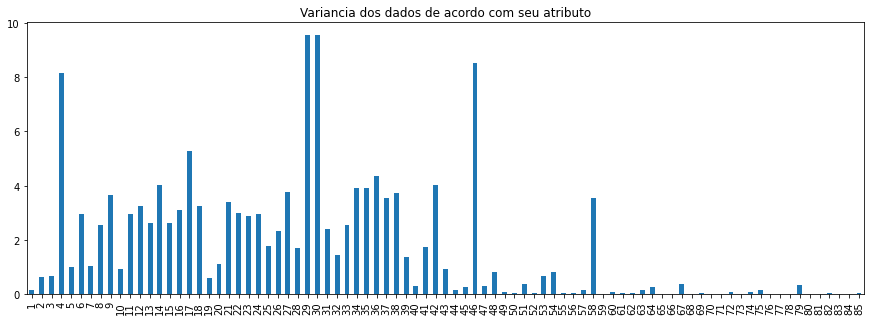

In [35]:
df_apolice_var = df_data[[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,85]].var().copy()
df_apolice_var.plot.bar(figsize=(15,5))
plt.title('Variancia dos dados de acordo com seu atributo')

## Análise de Seguros

Text(0.5, 1.0, 'Quantidade de apólices adquiridas por tipo')

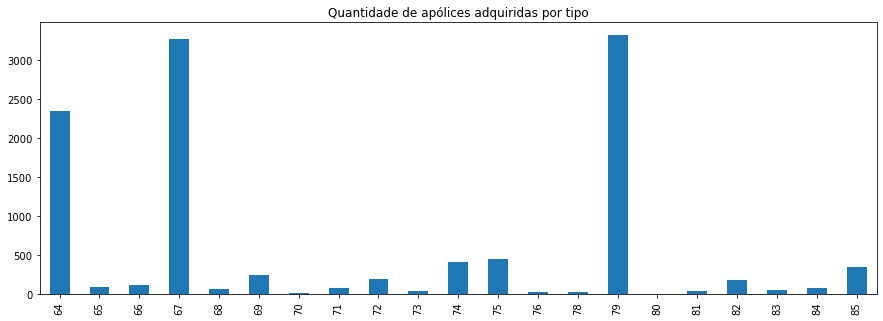

In [5]:
df_apolice = df_data[[64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85]].copy()
df_apolice.agg(np.sum).plot.bar(figsize=(15,5))
plt.title('Quantidade de apólices adquiridas por tipo')

## As três apólices mais vendidas e apolice que será utilizada em nossa previsão.


In [6]:
print(f'Quantidade de Apólices de seguro previdenciário de contribuição: {df_data[64].sum()}')
print(f'Quantidade de Apólices de seguro de terceiros (agricultura): {df_data[67].sum()}')
print(f'Quantidade de Apólices de seguro de invalidez: {df_data[79].sum()}')
print('')
print(f'Quantidade de Apólices de casas (dado que precisaremos prever): {df_data[85].sum()}')

Quantidade de Apólices de seguro previdenciário de contribuição: 2346
Quantidade de Apólices de seguro de terceiros (agricultura): 3273
Quantidade de Apólices de seguro de invalidez: 3319

Quantidade de Apólices de casas (dado que precisaremos prever): 348



1 20-30 anos    4 50-60 anos

2 30-40 anos    5 60-70 anos

3 40-50 anos    6 70-80 anos



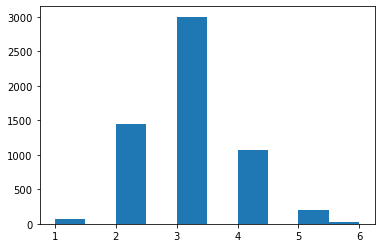

In [7]:
plt.hist(df_data[[3]])
str = """
1 20-30 anos    4 50-60 anos

2 30-40 anos    5 60-70 anos

3 40-50 anos    6 70-80 anos
"""
print(str)

## Quantidade de apólices por classes de idade

In [8]:
df_age = df_data.groupby(3)[[64,67,79]].agg(np.sum)
display(df_age)

,64,67,79
3,,,
1,35,34,37
2,634,832,830
3,1145,1695,1678
4,430,607,630
5,86,96,122
6,16,9,22


<AxesSubplot:xlabel='3'>

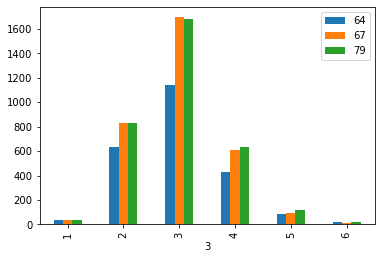

In [9]:
df_age.plot.bar()

In [10]:
df_corr = df_data[[3,79]].copy()
df_corr.corr()

,3,79
3,1.000000,0.024417
79,0.024417,1.000000


## Análise de Classe Social

Text(0.5, 1.0, 'Classe social D')

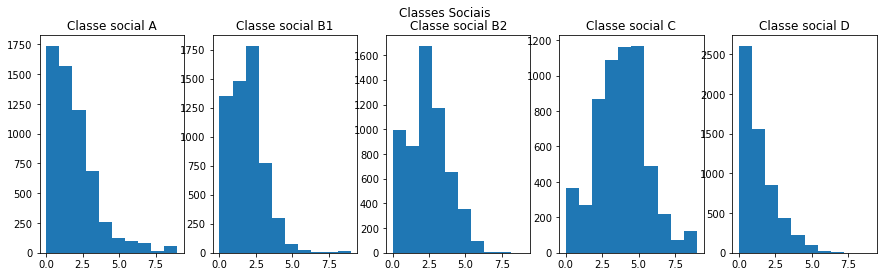

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,4))

fig.suptitle('Classes Sociais')

ax1.hist(df_data[24])
ax1.set_title('Classe social A')
ax2.hist(df_data[25])
ax2.set_title('Classe social B1')
ax3.hist(df_data[26])
ax3.set_title('Classe social B2')
ax4.hist(df_data[27])
ax4.set_title('Classe social C')
ax5.hist(df_data[28])
ax5.set_title('Classe social D')

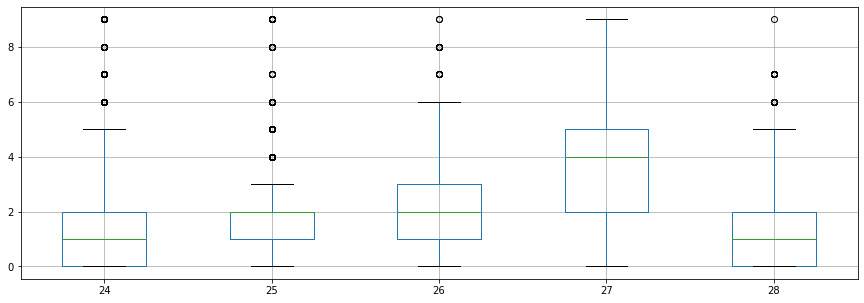

In [12]:
boxplot = df_data.boxplot(column=[24,25,26,27,28], figsize=(15,5))
plt.show()

# Correlação entre classe social, idade e contrantação de apolice de cas

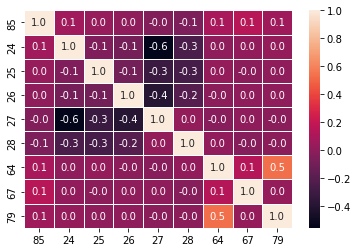

In [13]:
df_corr = df_data[[85,24,25,26,27,28,64,67,79]]
correlation = df_corr.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

## Análise de Renda

Text(0.5, 1.0, 'Renda > 123.000')

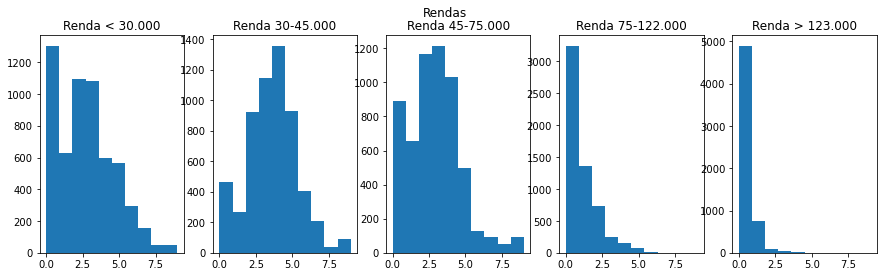

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(15,4))

fig.suptitle('Rendas')

ax1.hist(df_data[36])
ax1.set_title('Renda < 30.000')
ax2.hist(df_data[37])
ax2.set_title('Renda 30-45.000')
ax3.hist(df_data[38])
ax3.set_title('Renda 45-75.000')
ax4.hist(df_data[39])
ax4.set_title('Renda 75-122.000')
ax5.hist(df_data[40])
ax5.set_title('Renda > 123.000')

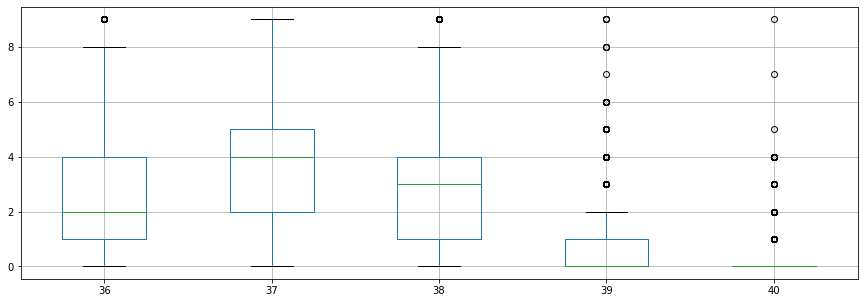

In [15]:
boxplot = df_data.boxplot(column=[36,37,38,39,40], figsize=(15,5))
plt.show()

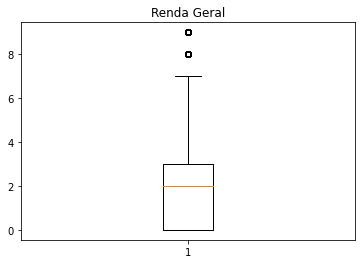

In [16]:
df_sum_renda = df_data[36].append(df_data[37])
df_sum_renda = df_sum_renda.append(df_data[38])
df_sum_renda = df_sum_renda.append(df_data[39])
df_sum_renda = df_sum_renda.append(df_data[40])
plt.boxplot(df_sum_renda)
plt.title("Renda Geral")
plt.show()

## Correlação entre classe social, renda e contratação de apolice de casa

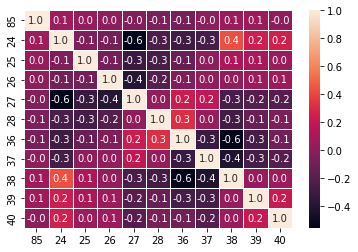

In [17]:
df_corr = df_data[[85,24,25,26,27,28,36,37,38,39,40]]
correlation = df_corr.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

## Correlação entre renda e as 3 apólices mais vendidas

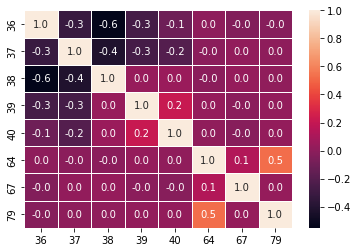

In [18]:
df_corr = df_data[[36,37,38,39,40,64,67,79]]
correlation = df_corr.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

## Análise Nivel de Escolariedade

Text(0.5, 1.0, 'Educação de Nível Superior')

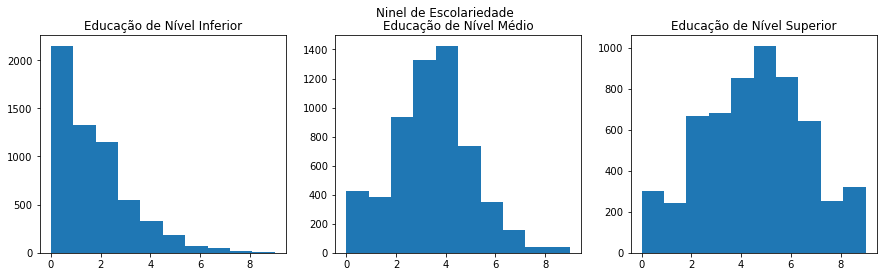

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

fig.suptitle('Ninel de Escolariedade')

ax1.hist(df_data[15])
ax1.set_title('Educação de Nível Inferior')
ax2.hist(df_data[16])
ax2.set_title('Educação de Nível Médio')
ax3.hist(df_data[17])
ax3.set_title('Educação de Nível Superior')

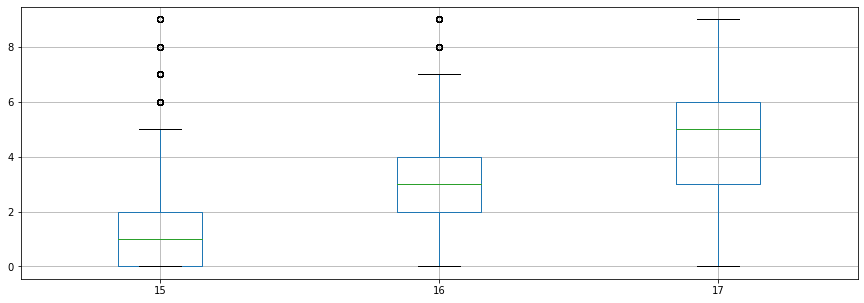

In [20]:
boxplot = df_data.boxplot(column=[15,16,17], figsize=(15,5))
plt.show()

## Correlação entre Nivel de Escolaridade, Renda e contratação ou não de apolice de casa

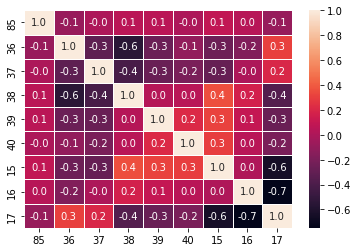

In [21]:
df_corr = df_data[[85,36,37,38,39,40,15,16,17]]
correlation = df_corr.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

# Treinamento de modelos

In [22]:
X = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]

y = 85

In [23]:
#Separação de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_data[X], df_data[y], test_size=0.3, random_state=12)

<h1>Métodos para exibição de métricas dos modelos selecionados</h1>

In [24]:
#Criação de métodos para calculo e exibição de valores de dados necessários para a analise da cada modelo
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


def metricas(modelo, X_test, y_test):
    fitted = modelo.predict(X_test)
    fittedprob = modelo.predict_proba(X_test)
    fittedprob = fittedprob[:,1]
    print('cross validate : ', cross_validate(modelo, X_test, y_test, cv=4))
    print('')
    print('Matriz de confusão : ', '\n' ,confusion_matrix(y_test, fitted))
    print('')
    print('Recall : ', '\n' ,recall_score(y_test, fitted, average='macro'))
    print('')
    print('Precision : ' , '\n' ,precision_score(y_test, fitted, average='macro'))
    print('')
    print('F1 - Macro : ', '\n' ,metrics.f1_score(y_test, fitted, average='macro'))
    print('')
    print('AUC : ', '\n' ,metrics.roc_auc_score(y_test, fittedprob))
    print('')
    print(classification_report(y_test,fitted))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, fitted, pos_label=2)
    fper, tper, thresholds = roc_curve(y_test, fittedprob)
    plot_roc_curve(fper, tper)

<h1> Treinando com todos os atributos</h1>

<h1>Naive Bayes</h1>

In [37]:
#Instanciando modelo e efetuando o seu treinamento
naive = MultinomialNB()
naive.fit(X_train, y_train)


MultinomialNB()

cross validate :  {'fit_time': array([0.00698447, 0.00598669, 0.00498295, 0.00299048]), 'score_time': array([0.0039866 , 0.0039885 , 0.00199389, 0.00199509]), 'test_score': array([0.80091533, 0.75514874, 0.74599542, 0.80275229])}

Matriz de confusão :  
 [[1281  368]
 [  40   58]]

Recall :  
 0.6843355899060655

Precision :  
 0.5529350719507558

F1 - Macro :  
 0.5420001542138947

AUC :  
 0.7254489424635834

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1649
           1       0.14      0.59      0.22        98

    accuracy                           0.77      1747
   macro avg       0.55      0.68      0.54      1747
weighted avg       0.92      0.77      0.83      1747



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


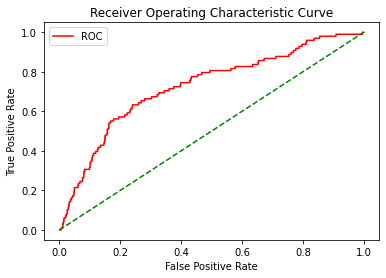

In [38]:
#Chamando metodo que retorna as métricas, passando para o método o modelo treinado acima 
#e os dados de teste para calculo das metricas
metricas(naive,X_test,y_test)

<h1>Regressão logistica</h1>

In [39]:
#Instanciando modelo e efetuando o seu treinamento
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

cross validate :  {'fit_time': array([0.21574044, 0.27799654, 0.42466331, 0.199651  ]), 'score_time': array([0.00200176, 0.00200152, 0.00296164, 0.00200176]), 'test_score': array([0.93363844, 0.93135011, 0.93363844, 0.93577982])}

Matriz de confusão :  
 [[1637   12]
 [  97    1]]

Recall :  
 0.5014634719867328

Precision :  
 0.5104915269275131

F1 - Macro :  
 0.4928990474364403

AUC :  
 0.7572431034269378

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1649
           1       0.08      0.01      0.02        98

    accuracy                           0.94      1747
   macro avg       0.51      0.50      0.49      1747
weighted avg       0.90      0.94      0.91      1747



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


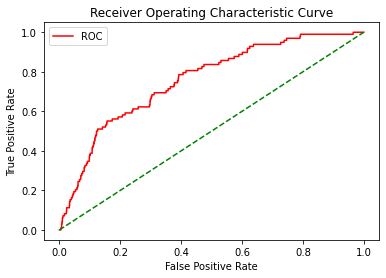

In [40]:
#Chamando metodo que retorna as métricas, passando para o método o modelo treinado acima 
#e os dados de teste para calculo das metricas
metricas(model, X_test,y_test)

<h1>KNN</h1>

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [ ]:
#Instanciando modelo, definindo a quantidade de vizinhos que o modelo utilizará (no caso 3) 
#efetuando o seu treinamento e imprimindo sua matriz de probabilidades
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.predict(X_test)
print (knn.predict_proba(X_test))

In [ ]:
#Chamando metodo que retorna as métricas, passando para o método o modelo treinado acima 
#e os dados de teste para calculo das metricas
metricas(knn, X_test,y_test)

# XGBoosting

In [ ]:
#Instanciando modelo e efetuando o seu treinamento
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_train, y_train)

In [ ]:
#Chamando metodo que retorna as métricas, passando para o método o modelo treinado acima 
#e os dados de teste para calculo das metricas
metricas(xgb,X_test,y_test)

<h1>Random Forest</h1>

In [41]:
#Instanciando modelo e efetuando o seu treinamento
rf = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

cross validate :  {'fit_time': array([1.24470377, 1.1928091 , 1.24566579, 1.20876694]), 'score_time': array([0.0747664 , 0.07579708, 0.07280731, 0.08876038]), 'test_score': array([0.93363844, 0.93363844, 0.9382151 , 0.93807339])}

Matriz de confusão :  
 [[1621   28]
 [  96    2]]

Recall :  
 0.5017140876969344

Precision :  
 0.5053775965831877

F1 - Macro :  
 0.4972055109922757

AUC :  
 0.7259996782218042

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1649
           1       0.07      0.02      0.03        98

    accuracy                           0.93      1747
   macro avg       0.51      0.50      0.50      1747
weighted avg       0.89      0.93      0.91      1747



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


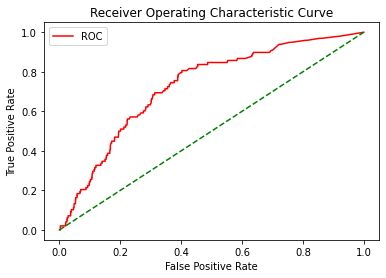

In [26]:
#Chamando metodo que retorna as métricas, passando para o método o modelo treinado acima 
#e os dados de teste para calculo das metrica
metricas(rf, X_test, y_test)

<h2>Tentativa de melhora do Random Forest</h2>

In [ ]:
#Utilização do RandomForestClassifier para treinarmos vários modelos simultaneamente, comparando com os critérios definidos
#na variavel random_search, a fim de tentar encontrar o melhor modelo a partir do treinamento 90 modelos
#30 iterações x 3 vezes cada modelo pelo cross validation
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

rf_hyper = RandomForestClassifier()
model_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_search, n_iter = 30, 
                               cv = 3, verbose= 0, random_state= 12, n_jobs = -1)
model_hyper.fit(X_train,y_train)

In [ ]:
#O modelo acima possui um atributo chamado best_estimator, que seria o melhor modelo treinado entre os 90, utilizamos o
#melhor para definir as métricas
metricas(model_hyper.best_estimator_, X_test,y_test)

<h1>Treinando com os melhores atributos</h1>

<h2>Lasso Regression para selecionar melhores atributos</h2>

In [43]:
#Inicialização do GridSearchCV, passando o Lasso regression e os atributos abaixo para definição de quais são as melhores
#features para o modelo
search = GridSearchCV(Lasso(),
                      {'alpha':[0.0015,0.0025,0.0030,0.002,0.003,0.005]},
                      cv = 4, scoring="neg_mean_squared_error",verbose=0
                      )

In [44]:
#treinamento do modelo
search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0015, 0.0025, 0.003, 0.002, 0.003, 0.005]},
             scoring='neg_mean_squared_error')

In [45]:
#verificando qual foi o alpha que obteve melhores resultados dentre todo o array passado
search.best_params_

{'alpha': 0.0025}

In [46]:
#armazenando na variavel coefficients os valores de todos os coeficientes do melhor melhor
coefficients = search.best_estimator_.coef_

In [47]:
#Criando um array com um valor absoluto (sempre positivo) de todos os atributos
importance = np.abs(coefficients)
importance

array([2.96934860e-04, 0.00000000e+00, 0.00000000e+00, 1.45743978e-03,
       9.03984413e-05, 0.00000000e+00, 3.08407904e-03, 4.26675027e-03,
       1.67676200e-03, 4.34559521e-03, 0.00000000e+00, 0.00000000e+00,
       1.43074846e-03, 0.00000000e+00, 0.00000000e+00, 3.65506012e-03,
       0.00000000e+00, 4.04414311e-03, 0.00000000e+00, 0.00000000e+00,
       2.09007020e-03, 3.23169962e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.07686180e-03, 0.00000000e+00, 3.11335683e-04,
       0.00000000e+00, 1.84191205e-05, 0.00000000e+00, 9.72513747e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.59740173e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.90877231e-03,
       2.76189722e-03, 2.01190709e-03, 1.20192181e-03, 6.37830388e-03,
       0.00000000e+00, 0.00000000e+00, 1.17750764e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.00612402e-03, 0.00000000e+00,
      

In [48]:
#Verificando quantos atributos são interessantes para nós (os que possuem valor maior do que zero)
np.array(X)[importance > 0].size

28

In [52]:
#Criação de dataframes apenas com os melhores atributos e não mais todos eles
df_data_melhores = df_data[np.array(X)[importance > 0]]
df_eval_melhores = df_eval[np.array(X)[importance > 0]]

In [53]:
#Separando em treino e teste os dataframes criados acima
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_data_melhores, df_data[y], test_size=0.3, random_state=12)

<h1>Naive Baies</h1>

In [ ]:
naive = MultinomialNB()
naive.fit(X_train2, y_train2)

In [ ]:
metricas(naive , X_test2,y_test2)

<h1>Regressão logistica</h1>

In [ ]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')

In [ ]:
model.fit(X_train2, y_train2)

In [ ]:
metricas(model , X_test2,y_test2)

<h1>KNN</h1>

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, y_train2)
knn.predict(X_test2)
print (knn.predict_proba(X_test2))

In [ ]:
metricas(knn, X_test2,y_test2)

# XGBoosting

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_train2, y_train2)

In [ ]:
metricas(xgb,X_test2,y_test2)

<h1>Random Forest</h1>

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
rf.fit(X_train2, y_train2)

In [ ]:
metricas(rf,X_test2,y_test2)

<h2>Tentativa de melhora do Random Forest</h2>

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

rf_hyper = RandomForestClassifier()
model_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_search, n_iter = 30, 
                               cv = 3, verbose= 0, random_state= 12, n_jobs = -1)
model_hyper.fit(X_train2,y_train2)

In [ ]:
metricas(model_hyper.best_estimator_, X_test2,y_test2)

<h1>Treinando com os melhores atributos e efetuando balanceamento dos dados para baixo</h1>

In [54]:
#Utilizamos o RandomUnderSampler para balancear nossos datasets, ficando assim o nosso atributo alvo com a mesma quantidade
#de valores, ajudando assim nos calculos de treinamento de modelos.
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train2, y_train2)

In [57]:
#verificando a quantidade de valores do nosso atributo alvo
y_res.value_counts()

0    250
1    250
Name: 85, dtype: int64

<h1>Naive Baies </h1>

In [ ]:
naive = MultinomialNB()
naive.fit(X_res, y_res)

fitted = naive.predict(X_test2)

In [ ]:
metricas(naive , X_test2,y_test2)

<h1>Regressão logistica</h1>

In [ ]:
model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')

In [ ]:
model.fit(X_res, y_res)

In [ ]:
metricas(model , X_test2,y_test2)

<h1>KNN</h1>

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_res, y_res)
knn.predict(X_test2)
print (knn.predict_proba(X_test2))

In [ ]:
metricas(knn, X_test2,y_test2)

# XGBoosting

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_res, y_res)

In [ ]:
metricas(xgb,X_test2,y_test2)

<h1>Random Forest</h1>

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
rf.fit(X_res, y_res)

In [ ]:
metricas(rf,X_test2,y_test2)

<h2>Tentativa de melhora do Random Forest</h2>

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

rf_hyper = RandomForestClassifier()
model_hyper = RandomizedSearchCV(estimator = rf_hyper, param_distributions = random_search, n_iter = 30, 
                               cv = 3, verbose= 0, random_state= 12, n_jobs = -1)
model_hyper.fit(X_res, y_res)

In [ ]:
metricas(model_hyper.best_estimator_, X_test2,y_test2)

<h2>Com base nos modelos criados a partir do dicdata, concordamos que o melhor modelo apresentado foi o modelo utilizando XGBoosting com todos os dados</h2>

<h3>Aplicando validação com o melhor modelo selecionado por nós</h3>

In [49]:
xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<h4>Verificando resultado de treinamento com melhor modelo</h4>

cross validate :  {'fit_time': array([0.71891236, 0.75313783, 0.71106935, 0.70910358]), 'score_time': array([0.01595712, 0.01200056, 0.01196837, 0.01199937]), 'test_score': array([0.926, 0.918, 0.923, 0.915])}

Matriz de confusão :  
 [[3673   89]
 [ 220   18]]

Recall :  
 0.5259863115900267

Precision :  
 0.5558563057104652

F1 - Macro :  
 0.5319910260415187

AUC :  
 0.6720907661310138

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3762
           1       0.17      0.08      0.10       238

    accuracy                           0.92      4000
   macro avg       0.56      0.53      0.53      4000
weighted avg       0.90      0.92      0.91      4000



C:\Users\Marcos Tamas\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


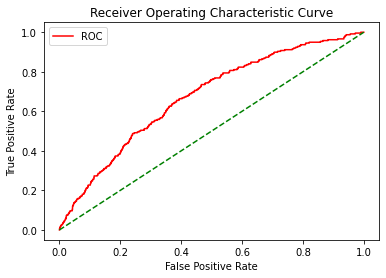

In [50]:
metricas(xgb,df_eval,df_tgts[0])

<h3>Referencias</h3>

https://scikit-learn.org/stable/tutorial/machine_learning_map/<br>
https://scikit-learn.org/stable/modules/cross_validation.html <br>
http://neylsoncrepalde.github.io/2019-11-25-regressao_logistica_python/ <br>
https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>
https://www.yourdatateacher.com/2021/05/05/feature-selection-in-machine-learning-using-lasso-regression/ <br>